In [1]:
#Required packages
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string

In [2]:
#stop_words
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
#X is a list which is further casted as a tuple, where first element is name of document and second is the text in documents.
#Y is the list of categories
X  =[] 
Y = []
for category in os.listdir("C:/Users/Neerva/Documents/coding_ninjas_ML/20_project_text_classification/20_newsgroups"):
    for document in os.listdir("C:/Users/Neerva/Documents/coding_ninjas_ML/20_project_text_classification/20_newsgroups/"+category):
        with open("C:/Users/Neerva/Documents/coding_ninjas_ML/20_project_text_classification/20_newsgroups/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [4]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can see it is a tuple with first element as name of document and second text of document.
print(X[0])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('49960', 'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines:

In [5]:
#train-test split
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y)

In [6]:
#split has been done in nearly 3:1 ratio
print(len(x_train))
print(len(x_test))

14997
5000


In [7]:
#Demonstrating re.split
sample_text="Hey! I am Mohak. I play karate. What's up?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Mohak', 'I', 'play', 'karate', 'What', 's', 'up', '']


In [8]:
#Making a Dictionary of words with their corresponding frequency
dic={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of doc and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dic:
            dic[s]+=1
        else:
            dic[s]=1
dic

{'newsgroups': 15291,
 'misc': 8817,
 'forsale': 2059,
 'path': 15277,
 'cantaloupe': 19524,
 'srv': 24247,
 'cmu': 39325,
 'edu': 122691,
 'rochester': 3683,
 'udel': 3306,
 'bogus': 1050,
 'sura': 2794,
 'net': 19026,
 'news': 25752,
 'feed': 826,
 'peachnet': 675,
 'gatech': 3318,
 'purdue': 1206,
 'mentor': 270,
 'sage': 42,
 'kari': 23,
 'subject': 16245,
 'new': 5183,
 'young': 587,
 'seagate': 74,
 'hard': 1571,
 'drive': 2056,
 'message': 16421,
 'dzt': 1,
 'sender': 8274,
 'usenet': 6183,
 'organization': 14874,
 'university': 7447,
 'computing': 519,
 'center': 1336,
 'distribution': 3573,
 'computers': 742,
 'date': 15570,
 'fri': 1782,
 'apr': 15414,
 'gmt': 13343,
 'lines': 15646,
 'greetings': 67,
 'netters': 114,
 'ide': 501,
 'bought': 469,
 'yesterday': 291,
 'able': 1355,
 'come': 1913,
 'across': 364,
 'going': 2467,
 'buy': 1011,
 'need': 3175,
 'sell': 592,
 'one': 11742,
 'guarantee': 125,
 'will': 11672,
 'work': 2961,
 'still': 2676,
 'transferable': 9,
 'warran

In [9]:
#Sorting the dictionary on the basis of frequency of words in descending order
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1),reverse=True)
sorted_dic

[('edu', 122691),
 ('cmu', 39325),
 ('com', 37563),
 ('news', 25752),
 ('not', 25161),
 ('srv', 24247),
 ('cantaloupe', 19524),
 ('net', 19026),
 ('message', 16421),
 ('subject', 16245),
 ('lines', 15646),
 ('date', 15570),
 ('apr', 15414),
 ('newsgroups', 15291),
 ('path', 15277),
 ('can', 15097),
 ('organization', 14874),
 ('state', 14181),
 ('gmt', 13343),
 ('ohio', 11929),
 ('one', 11742),
 ('will', 11672),
 ('writes', 10985),
 ('article', 10098),
 ('comp', 9756),
 ('references', 9715),
 ('talk', 9231),
 ('misc', 8817),
 ('ans', 8291),
 ('sender', 8274),
 ('howland', 8231),
 ('reston', 8202),
 ('don', 8077),
 ('people', 7856),
 ('like', 7840),
 ('just', 7459),
 ('university', 7447),
 ('posting', 7281),
 ('nntp', 7007),
 ('mps', 6913),
 ('know', 6903),
 ('host', 6685),
 ('sci', 6612),
 ('get', 6506),
 ('think', 6255),
 ('zaphod', 6239),
 ('usenet', 6183),
 ('may', 6098),
 ('alt', 5989),
 ('politics', 5946),
 ('also', 5687),
 ('windows', 5488),
 ('rutgers', 5306),
 ('use', 5254),
 ('

In [10]:
import matplotlib.pyplot as plt

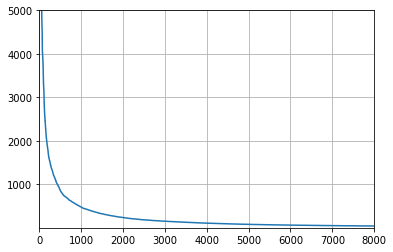

In [11]:
 #On the basis of this graph we can decide the number of features we want to take
features=sorted_dic
answer1=[]
answer2=[]
for i in range(len(features)):
    answer1.append(i)
    answer2.append(features[i][1])
plt.plot(answer1,answer2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [12]:
#Taking top 2000 words with max freuqency as our feature
#here feature list is answer1
answer1=[features[i][0] for i in range(2000)]
answer1

['edu',
 'cmu',
 'com',
 'news',
 'not',
 'srv',
 'cantaloupe',
 'net',
 'message',
 'subject',
 'lines',
 'date',
 'apr',
 'newsgroups',
 'path',
 'can',
 'organization',
 'state',
 'gmt',
 'ohio',
 'one',
 'will',
 'writes',
 'article',
 'comp',
 'references',
 'talk',
 'misc',
 'ans',
 'sender',
 'howland',
 'reston',
 'don',
 'people',
 'like',
 'just',
 'university',
 'posting',
 'nntp',
 'mps',
 'know',
 'host',
 'sci',
 'get',
 'think',
 'zaphod',
 'usenet',
 'may',
 'alt',
 'politics',
 'also',
 'windows',
 'rutgers',
 'use',
 'time',
 'new',
 'harvard',
 'near',
 'eng',
 'rec',
 'good',
 'sei',
 'soc',
 'crabapple',
 'noc',
 'well',
 'system',
 'xref',
 'das',
 'cis',
 'now',
 'even',
 'see',
 'europa',
 'uunet',
 'gtefsd',
 'ece',
 'world',
 'way',
 'religion',
 'god',
 'make',
 'two',
 'say',
 'org',
 'christian',
 'many',
 'gov',
 'much',
 'right',
 'first',
 'rochester',
 'distribution',
 'club',
 'want',
 'andrew',
 'space',
 'mail',
 'gatech',
 'udel',
 'anyone',
 'said'

In [13]:
#Forming x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of answer1(feature list)
x_train_dataset=np.zeros([len(x_train),len(answer1)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_train_dataset[i][answer1.index(j)]+=1

In [14]:
#Forming x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(answer1)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in answer1:
            x_test_dataset[i][answer1.index(j)]+=1

In [15]:
#printing x_train and x_test dataset 
print(x_train_dataset)
print("--------------------------")
print(x_test_dataset)

[[ 8  1  0 ...  0  0  0]
 [10  2  2 ...  0  0  0]
 [ 8  2  3 ...  0  0  0]
 ...
 [ 8  1  0 ...  0  0  0]
 [10  5  2 ...  0  0  0]
 [ 3  3  5 ...  0  0  0]]
--------------------------
[[ 2  1  1 ...  0  0  0]
 [11  3  1 ...  0  0  0]
 [ 7  2  5 ...  0  0  0]
 ...
 [16  1  0 ...  0  0  0]
 [ 6  4  0 ...  0  0  0]
 [ 7  1  0 ...  0  0  0]]


In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## Multinomial Naive Bayes using scikit-learn

In [17]:
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))

#Model evaluation: Confusion-matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on training data: 0.8923784756951391
Score on testing data: 0.856
[[203   0   0   0   1   0   0   3   0   0   0   0   0   0   1   1   0   1
    0  60]
 [  0 181  12  18   7   9   5   6   0   0   0   1   3   4   0   0   0   0
    0   0]
 [  0   3 213  19   1  11   3   1   0   0   0   1   2   0   1   0   0   0
    0   0]
 [  0   1   8 206  31   1   6   1   0   0   0   0   2   0   0   0   0   0
    0   0]
 [  0   1   1  20 223   0   6   0   0   0   0   0   1   0   1   0   0   0
    0   0]
 [  0  16  20   3   3 201   2   0   0   0   0   0   1   0   3   0   0   0
    0   0]
 [  0   1   0   2   3   0 229   6   2   0   0   0   2   0   1   0   0   0
    0   0]
 [  0   0   0   0   1   0   6 223   8   1   0   0   5   0   0   0   0   0
    1   1]
 [  0   0   0   0   0   0   4  12 244   1   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   2   4   2 225  15   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   1   0   2   0   2  10 246   0   0   0   2   0   0   0
    

## Multinomial Naive Bayes implementation (from scratch)

In [18]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of document is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over answer1(actual feature list)
        for feature in answer1:
            #Calculating total word in feature
            l=(x_train_with_i[:,answer1.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count

In [19]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done because there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob

In [20]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [21]:
#predict function
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [22]:
#returns score
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [23]:
#Fit and predict using our own implemented Multinomial Naive Bayes
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)

In [24]:
#{word: no_of_occurences}
dictionary

{'total_doc': 14997,
 'sci.med': {'edu': 6466,
  'cmu': 2016,
  'com': 2080,
  'news': 1232,
  'not': 1358,
  'srv': 1227,
  'cantaloupe': 968,
  'net': 886,
  'message': 818,
  'subject': 838,
  'lines': 777,
  'date': 806,
  'apr': 794,
  'newsgroups': 787,
  'path': 784,
  'can': 868,
  'organization': 797,
  'state': 679,
  'gmt': 714,
  'ohio': 601,
  'one': 691,
  'will': 493,
  'writes': 529,
  'article': 576,
  'comp': 40,
  'references': 536,
  'talk': 37,
  'misc': 162,
  'ans': 401,
  'sender': 428,
  'howland': 395,
  'reston': 395,
  'don': 395,
  'people': 391,
  'like': 401,
  'just': 346,
  'university': 398,
  'posting': 323,
  'nntp': 313,
  'mps': 367,
  'know': 379,
  'host': 295,
  'sci': 1789,
  'get': 381,
  'think': 271,
  'zaphod': 329,
  'usenet': 289,
  'may': 359,
  'alt': 258,
  'politics': 14,
  'also': 411,
  'windows': 20,
  'rutgers': 17,
  'use': 393,
  'time': 280,
  'new': 344,
  'harvard': 314,
  'near': 198,
  'eng': 300,
  'rec': 156,
  'good': 27

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pandas as pd

In [26]:
#Model evaluation of our own implemented Multinomial Naive Bayes
print("Score on testing_data:",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score on testing_data: 0.8764
[[223   0   0   0   0   0   0   0   0   1   0   0   0   1   1   0   0   1
    0  43]
 [  0 198   8  18   2   7   3   2   0   0   0   1   2   4   1   0   0   0
    0   0]
 [  0  10 201  26   1  15   2   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   3 223  23   0   4   0   0   0   0   1   2   0   0   0   0   0
    0   0]
 [  0   1   0  12 232   1   4   0   0   0   0   0   2   1   0   0   0   0
    0   0]
 [  0  15  19   3   2 209   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   0   0   3   3   0 225   8   1   0   0   0   5   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   7 231   2   0   0   0   4   0   0   0   1   0
    1   0]
 [  0   0   0   0   0   0   6   7 246   1   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   1   0   0 240  10   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   1   7 253   0   0   0   0   0   0   0
    0   0]
 [  0   2   0   0   0   2   0   0  

RESULT:

We have performed text-classification by using sklearn as well as pur own implementation of multinomial naive bayes classifier. 

We found out that sklearn gave score of 0.86 on testing_data,whereas self implemented classifier gave 0.87 on testing data, which is very close.